# Neural Networks

In [1]:
from nn_models import Four_Layer_NN, Six_Layer_NN, Ten_Layer_NN
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from preprocessing import preprocessing_data
import pandas as pd
from sklearn.model_selection import train_test_split

df_raw = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df = preprocessing_data(df_raw)
genres = df['track_genre'].unique()

From the feature importance derived from random forests, we select the top 10 features to reduce noise from irrelevant features. To optimize model performance, we designed three feedforward neural network architectures with 4, 6, and 10 layers, incorporating dropout and batch normalization layers to mitigate overfitting and stabilize training.

In [ ]:

X = df.drop(['track_genre', 'mode', 'explicit', 'liveness', 'key', 'time_signature'], axis = 1)
y = LabelEncoder().fit_transform(df['track_genre'])

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=2000, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=1000, random_state=123, stratify=y_temp)

# Convert to categorical (onehot encoding matrices)
y_train = to_categorical(y_train, num_classes=20)
y_valid = to_categorical(y_valid, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)

### Four Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64]
dropout = [0.2,0.3]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Four_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1780 - loss: 3.0373 - val_accuracy: 0.4450 - val_loss: 2.0548
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3697 - loss: 2.2233 - val_accuracy: 0.5010 - val_loss: 1.8159
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4088 - loss: 2.0432 - val_accuracy: 0.5120 - val_loss: 1.7264
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4218 - loss: 1.9605 - val_accuracy: 0.5350 - val_loss: 1.6675
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4351 - loss: 1.9100 - val_accuracy: 0.5220 - val_loss: 1.6223
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4328 - loss: 1.8601 - val_accuracy: 0.5340 - val_loss: 1.5859
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4434 - loss: 1.8339 - val_accuracy: 0.5450 - val_loss: 1.5718
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4552 - loss: 1.79

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1392 - loss: 3.1796 - val_accuracy: 0.4310 - val_loss: 2.1901
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3063 - loss: 2.3979 - val_accuracy: 0.4840 - val_loss: 1.9408
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3497 - loss: 2.2005 - val_accuracy: 0.4820 - val_loss: 1.8115
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3556 - loss: 2.1103 - val_accuracy: 0.4990 - val_loss: 1.7418
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3774 - loss: 2.0385 - val_accuracy: 0.5160 - val_loss: 1.6971
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3916 - loss: 1.9840 - val_accuracy: 0.5100 - val_loss: 1.6656
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3994 - loss: 1.9680 - val_accuracy: 0.5110 - val_loss: 1.6354
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4046 - loss: 1.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1330 - loss: 3.2178 - val_accuracy: 0.4090 - val_loss: 2.3290
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3270 - loss: 2.3771 - val_accuracy: 0.4890 - val_loss: 1.9604
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3883 - loss: 2.1360 - val_accuracy: 0.4960 - val_loss: 1.8188
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4204 - loss: 2.0104 - val_accuracy: 0.5210 - val_loss: 1.7306
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4348 - loss: 1.9300 - val_accuracy: 0.5170 - val_loss: 1.6821
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4455 - loss: 1.8950 - val_accuracy: 0.5330 - val_loss: 1.6513
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4511 - loss: 1.8444 - val_accuracy: 0.5260 - val_loss: 1.6071
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4621 - loss: 1.80

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1321 - loss: 3.2469 - val_accuracy: 0.3780 - val_loss: 2.4257
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2629 - loss: 2.5509 - val_accuracy: 0.4340 - val_loss: 2.0676
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3331 - loss: 2.2959 - val_accuracy: 0.4610 - val_loss: 1.9115
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3580 - loss: 2.1559 - val_accuracy: 0.4920 - val_loss: 1.8289
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3758 - loss: 2.0828 - val_accuracy: 0.4990 - val_loss: 1.7672
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - loss: 2.0379 - val_accuracy: 0.5000 - val_loss: 1.7222
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3987 - loss: 2.0096 - val_accuracy: 0.5030 - val_loss: 1.6888
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 1.96

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2960 - loss: 2.4303 - val_accuracy: 0.4610 - val_loss: 1.7796
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4002 - loss: 1.9871 - val_accuracy: 0.4890 - val_loss: 1.6952
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4160 - loss: 1.9398 - val_accuracy: 0.4970 - val_loss: 1.7294
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4138 - loss: 1.9244 - val_accuracy: 0.4890 - val_loss: 1.6648
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4153 - loss: 1.9200 - val_accuracy: 0.5170 - val_loss: 1.6206
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4168 - loss: 1.8948 - val_accuracy: 0.5250 - val_loss: 1.6377
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4193 - loss: 1.9140 - val_accuracy: 0.4990 - val_loss: 1.6517
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4228 - loss: 1.88

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2662 - loss: 2.5647 - val_accuracy: 0.4310 - val_loss: 1.8320
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3500 - loss: 2.1314 - val_accuracy: 0.4280 - val_loss: 1.8507
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3705 - loss: 2.0805 - val_accuracy: 0.4560 - val_loss: 1.7507
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3718 - loss: 2.0558 - val_accuracy: 0.4840 - val_loss: 1.7455
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3754 - loss: 2.0628 - val_accuracy: 0.4960 - val_loss: 1.7070
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3756 - loss: 2.0323 - val_accuracy: 0.4730 - val_loss: 1.7336
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3851 - loss: 2.0199 - val_accuracy: 0.4820 - val_loss: 1.7362
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3775 - loss: 2.04

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2959 - loss: 2.5100 - val_accuracy: 0.4170 - val_loss: 1.8895
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4202 - loss: 1.9207 - val_accuracy: 0.4850 - val_loss: 1.6959
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4188 - loss: 1.8881 - val_accuracy: 0.5030 - val_loss: 1.6485
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4357 - loss: 1.8373 - val_accuracy: 0.5000 - val_loss: 1.6582
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4315 - loss: 1.8362 - val_accuracy: 0.4820 - val_loss: 1.6730
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4349 - loss: 1.8330 - val_accuracy: 0.4970 - val_loss: 1.6033
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4369 - loss: 1.8288 - val_accuracy: 0.5090 - val_loss: 1.5762
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4392 - loss: 1.81

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2590 - loss: 2.5867 - val_accuracy: 0.4050 - val_loss: 2.0441
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3693 - loss: 2.0626 - val_accuracy: 0.4590 - val_loss: 1.7887
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - loss: 1.9966 - val_accuracy: 0.4670 - val_loss: 1.7061
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3834 - loss: 1.9814 - val_accuracy: 0.4730 - val_loss: 1.7064
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3984 - loss: 1.9594 - val_accuracy: 0.4820 - val_loss: 1.6895
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3962 - loss: 1.9577 - val_accuracy: 0.4920 - val_loss: 1.7058
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4008 - loss: 1.9580 - val_accuracy: 0.4890 - val_loss: 1.6260
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3981 - loss: 1.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2039 - loss: 2.8946 - val_accuracy: 0.2780 - val_loss: 2.4542
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2376 - loss: 2.6955 - val_accuracy: 0.2610 - val_loss: 2.5933
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2367 - loss: 2.6850 - val_accuracy: 0.2730 - val_loss: 2.5700
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2466 - loss: 2.6887 - val_accuracy: 0.3140 - val_loss: 2.4853
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2541 - loss: 2.7061 - val_accuracy: 0.2380 - val_loss: 2.7066
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2570 - loss: 2.6809 - val_accuracy: 0.2870 - val_loss: 2.4605
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2635 - loss: 2.6425 - val_accuracy: 0.3010 - val_loss: 2.5495
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2601 - loss: 2.66

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1874 - loss: 2.9843 - val_accuracy: 0.2540 - val_loss: 2.4878
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1921 - loss: 2.8272 - val_accuracy: 0.2740 - val_loss: 2.5103
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2117 - loss: 2.8117 - val_accuracy: 0.2860 - val_loss: 2.4389
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2148 - loss: 2.7919 - val_accuracy: 0.2670 - val_loss: 2.6379
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2127 - loss: 2.7952 - val_accuracy: 0.1860 - val_loss: 2.7019
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2114 - loss: 2.8068 - val_accuracy: 0.2790 - val_loss: 2.5248
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2146 - loss: 2.8101 - val_accuracy: 0.2340 - val_loss: 2.6990
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2150 - loss: 2.79

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2477 - loss: 2.7351 - val_accuracy: 0.2500 - val_loss: 2.5362
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2845 - loss: 2.5206 - val_accuracy: 0.3480 - val_loss: 2.3775
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3032 - loss: 2.4626 - val_accuracy: 0.3440 - val_loss: 2.3317
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3102 - loss: 2.4479 - val_accuracy: 0.3090 - val_loss: 2.3887
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3001 - loss: 2.4552 - val_accuracy: 0.3870 - val_loss: 2.1987
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3006 - loss: 2.4749 - val_accuracy: 0.3000 - val_loss: 2.4069
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3119 - loss: 2.4373 - val_accuracy: 0.3280 - val_loss: 2.3295
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3180 - loss: 2.42

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 20)                  │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 3,876 (15.14 KB)

 Non-trainable params: 224 (896.00 B)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1866 - loss: 2.8724 - val_accuracy: 0.2990 - val_loss: 2.5401
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2392 - loss: 2.6440 - val_accuracy: 0.3100 - val_loss: 2.4303
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2460 - loss: 2.6078 - val_accuracy: 0.2320 - val_loss: 2.5482
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2545 - loss: 2.5872 - val_accuracy: 0.2650 - val_loss: 2.6068
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2586 - loss: 2.5874 - val_accuracy: 0.2080 - val_loss: 2.4833
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2652 - loss: 2.5872 - val_accuracy: 0.2580 - val_loss: 2.5956
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2650 - loss: 2.5930 - val_accuracy: 0.2600 - val_loss: 2.6549
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2677 - loss: 2.59

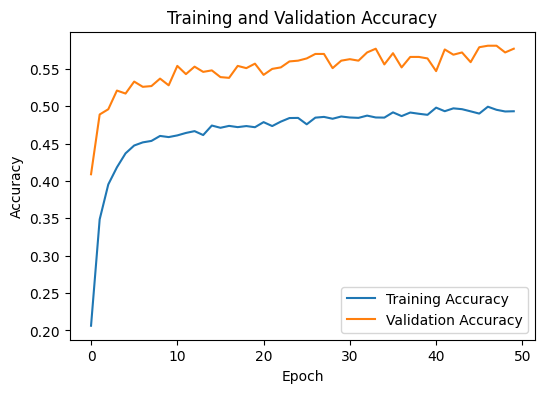

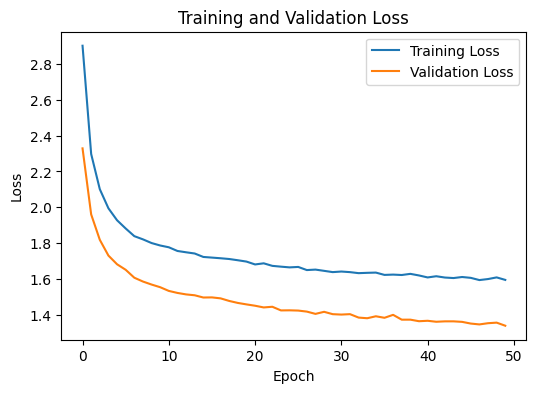

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5773 - loss: 1.3965


[1.3894131183624268, 0.5740000009536743]

### 6 Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64]
dropout = [0.1, 0.2, 0.3]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Six_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1728 - loss: 3.1767 - val_accuracy: 0.4760 - val_loss: 1.9919
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3832 - loss: 2.2027 - val_accuracy: 0.5140 - val_loss: 1.7549
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4171 - loss: 2.0012 - val_accuracy: 0.5250 - val_loss: 1.6284
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4518 - loss: 1.8686 - val_accuracy: 0.5540 - val_loss: 1.5688
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4622 - loss: 1.8054 - val_accuracy: 0.5430 - val_loss: 1.5236
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4661 - loss: 1.7732 - val_accuracy: 0.5600 - val_loss: 1.4839
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4709 - loss: 1.7483 - val_accuracy: 0.5610 - val_loss: 1.4734
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4726 - loss: 1.72

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1133 - loss: 3.3656 - val_accuracy: 0.4180 - val_loss: 2.2183
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2737 - loss: 2.4675 - val_accuracy: 0.4400 - val_loss: 1.9275
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3263 - loss: 2.2238 - val_accuracy: 0.4820 - val_loss: 1.7790
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3628 - loss: 2.0941 - val_accuracy: 0.4840 - val_loss: 1.7022
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3866 - loss: 2.0151 - val_accuracy: 0.4990 - val_loss: 1.6378
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3972 - loss: 1.9724 - val_accuracy: 0.5090 - val_loss: 1.6038
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4001 - loss: 1.9422 - val_accuracy: 0.4950 - val_loss: 1.5861
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4004 - loss: 1.92

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0905 - loss: 3.5267 - val_accuracy: 0.3750 - val_loss: 2.4199
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2122 - loss: 2.6798 - val_accuracy: 0.4120 - val_loss: 2.1326
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2660 - loss: 2.4104 - val_accuracy: 0.4310 - val_loss: 1.9700
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3000 - loss: 2.2771 - val_accuracy: 0.4540 - val_loss: 1.8616
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3130 - loss: 2.1935 - val_accuracy: 0.4720 - val_loss: 1.7844
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3324 - loss: 2.1359 - val_accuracy: 0.4790 - val_loss: 1.7513
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3362 - loss: 2.1085 - val_accuracy: 0.4830 - val_loss: 1.7175
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3445 - loss: 2.07

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1526 - loss: 3.2465 - val_accuracy: 0.4210 - val_loss: 2.2212
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3418 - loss: 2.3274 - val_accuracy: 0.5030 - val_loss: 1.8427
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4129 - loss: 2.0592 - val_accuracy: 0.5220 - val_loss: 1.6936
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4421 - loss: 1.9251 - val_accuracy: 0.5310 - val_loss: 1.6186
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4697 - loss: 1.8221 - val_accuracy: 0.5520 - val_loss: 1.5512
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4760 - loss: 1.7814 - val_accuracy: 0.5620 - val_loss: 1.5109
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4797 - loss: 1.7375 - val_accuracy: 0.5620 - val_loss: 1.4833
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4928 - loss: 1.70

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1087 - loss: 3.4148 - val_accuracy: 0.3770 - val_loss: 2.3422
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2675 - loss: 2.5476 - val_accuracy: 0.4360 - val_loss: 2.0126
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3304 - loss: 2.2788 - val_accuracy: 0.4900 - val_loss: 1.8436
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3590 - loss: 2.1385 - val_accuracy: 0.5010 - val_loss: 1.7534
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3876 - loss: 2.0366 - val_accuracy: 0.5030 - val_loss: 1.6913
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3962 - loss: 1.9705 - val_accuracy: 0.5050 - val_loss: 1.6440
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4091 - loss: 1.9502 - val_accuracy: 0.5230 - val_loss: 1.6051
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4262 - loss: 1.89

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0885 - loss: 3.5926 - val_accuracy: 0.3470 - val_loss: 2.5711
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1887 - loss: 2.7979 - val_accuracy: 0.4050 - val_loss: 2.2326
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2444 - loss: 2.5173 - val_accuracy: 0.4110 - val_loss: 2.0707
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2846 - loss: 2.3594 - val_accuracy: 0.4240 - val_loss: 1.9597
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3081 - loss: 2.2377 - val_accuracy: 0.4440 - val_loss: 1.8785
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3217 - loss: 2.1771 - val_accuracy: 0.4430 - val_loss: 1.8194
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3174 - loss: 2.1667 - val_accuracy: 0.4490 - val_loss: 1.7673
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3459 - loss: 2.08

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3016 - loss: 2.4531 - val_accuracy: 0.4510 - val_loss: 1.7561
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4129 - loss: 1.9578 - val_accuracy: 0.5080 - val_loss: 1.6296
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4339 - loss: 1.8939 - val_accuracy: 0.4950 - val_loss: 1.6867
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4489 - loss: 1.8600 - val_accuracy: 0.5050 - val_loss: 1.6738
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4326 - loss: 1.8810 - val_accuracy: 0.4980 - val_loss: 1.6693
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4374 - loss: 1.8523 - val_accuracy: 0.5090 - val_loss: 1.6183
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4498 - loss: 1.8305 - val_accuracy: 0.5180 - val_loss: 1.6048
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4586 - loss: 1.81

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2560 - loss: 2.5913 - val_accuracy: 0.4330 - val_loss: 1.8655
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3518 - loss: 2.1158 - val_accuracy: 0.4730 - val_loss: 1.7731
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3752 - loss: 2.0664 - val_accuracy: 0.4670 - val_loss: 1.7502
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3836 - loss: 2.0380 - val_accuracy: 0.5010 - val_loss: 1.7214
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3919 - loss: 2.0086 - val_accuracy: 0.4700 - val_loss: 1.7416
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3911 - loss: 2.0128 - val_accuracy: 0.4640 - val_loss: 1.7582
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3879 - loss: 2.0119 - val_accuracy: 0.4780 - val_loss: 1.7408
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3916 - loss: 1.99

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_76               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_77               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2062 - loss: 2.7636 - val_accuracy: 0.3640 - val_loss: 1.9408
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2874 - loss: 2.2622 - val_accuracy: 0.3870 - val_loss: 1.9629
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3001 - loss: 2.2265 - val_accuracy: 0.4020 - val_loss: 1.8722
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3103 - loss: 2.2073 - val_accuracy: 0.3940 - val_loss: 1.8504
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3130 - loss: 2.2117 - val_accuracy: 0.4280 - val_loss: 1.8256
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3237 - loss: 2.1738 - val_accuracy: 0.4380 - val_loss: 1.8687
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3198 - loss: 2.1756 - val_accuracy: 0.4260 - val_loss: 1.8493
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3215 - loss: 2.18

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3094 - loss: 2.4743 - val_accuracy: 0.5000 - val_loss: 1.7378
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4396 - loss: 1.8542 - val_accuracy: 0.5090 - val_loss: 1.6173
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4577 - loss: 1.7918 - val_accuracy: 0.4980 - val_loss: 1.6341
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4643 - loss: 1.7528 - val_accuracy: 0.5290 - val_loss: 1.5102
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4749 - loss: 1.7245 - val_accuracy: 0.5100 - val_loss: 1.5633
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 1.7341 - val_accuracy: 0.5320 - val_loss: 1.4940
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4810 - loss: 1.7010 - val_accuracy: 0.5360 - val_loss: 1.5221
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4818 - loss: 1.70

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2456 - loss: 2.6776 - val_accuracy: 0.4410 - val_loss: 1.8231
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3797 - loss: 2.0396 - val_accuracy: 0.4590 - val_loss: 1.7551
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3862 - loss: 1.9852 - val_accuracy: 0.4970 - val_loss: 1.6644
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4097 - loss: 1.9332 - val_accuracy: 0.4710 - val_loss: 1.7036
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4095 - loss: 1.9258 - val_accuracy: 0.4910 - val_loss: 1.6522
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4185 - loss: 1.9071 - val_accuracy: 0.5010 - val_loss: 1.6370
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4114 - loss: 1.9051 - val_accuracy: 0.4850 - val_loss: 1.6461
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4164 - loss: 1.89

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1923 - loss: 2.8364 - val_accuracy: 0.3300 - val_loss: 2.0708
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3158 - loss: 2.1831 - val_accuracy: 0.4280 - val_loss: 1.8199
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3247 - loss: 2.1383 - val_accuracy: 0.4090 - val_loss: 1.8908
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3481 - loss: 2.0785 - val_accuracy: 0.4230 - val_loss: 1.8233
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3412 - loss: 2.1026 - val_accuracy: 0.4440 - val_loss: 1.7394
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3468 - loss: 2.0898 - val_accuracy: 0.4490 - val_loss: 1.7702
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3534 - loss: 2.0660 - val_accuracy: 0.4340 - val_loss: 1.7457
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3596 - loss: 2.04

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_96 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_98               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_98 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_99 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_100 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2030 - loss: 2.9183 - val_accuracy: 0.2700 - val_loss: 2.6851
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2518 - loss: 2.6439 - val_accuracy: 0.2480 - val_loss: 3.0796
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2563 - loss: 2.6213 - val_accuracy: 0.3070 - val_loss: 2.4564
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2611 - loss: 2.6251 - val_accuracy: 0.3110 - val_loss: 2.5836
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2590 - loss: 2.6363 - val_accuracy: 0.3100 - val_loss: 2.3537
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2703 - loss: 2.5881 - val_accuracy: 0.3030 - val_loss: 2.4828
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2747 - loss: 2.5845 - val_accuracy: 0.2790 - val_loss: 2.6345
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2691 - loss: 2.58

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_101 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_102              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_102 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_103              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_104              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_105              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1570 - loss: 3.0537 - val_accuracy: 0.2330 - val_loss: 3.0713
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1833 - loss: 2.8590 - val_accuracy: 0.2180 - val_loss: 2.6432
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1960 - loss: 2.8106 - val_accuracy: 0.2550 - val_loss: 2.5600
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2064 - loss: 2.7980 - val_accuracy: 0.2380 - val_loss: 2.6965
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2119 - loss: 2.7844 - val_accuracy: 0.2610 - val_loss: 2.6448
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2156 - loss: 2.7946 - val_accuracy: 0.1800 - val_loss: 2.8366
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2113 - loss: 2.7849 - val_accuracy: 0.2600 - val_loss: 2.5250
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2223 - loss: 2.78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_106              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_107              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_108 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_109 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_110 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1240 - loss: 3.1884 - val_accuracy: 0.1620 - val_loss: 2.9504
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1459 - loss: 2.9796 - val_accuracy: 0.1580 - val_loss: 2.9406
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1583 - loss: 2.9421 - val_accuracy: 0.1610 - val_loss: 2.9458
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1701 - loss: 2.9474 - val_accuracy: 0.2210 - val_loss: 2.7800
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1622 - loss: 2.9435 - val_accuracy: 0.1860 - val_loss: 2.6507
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1718 - loss: 2.9005 - val_accuracy: 0.2360 - val_loss: 2.8316
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1603 - loss: 2.9688 - val_accuracy: 0.2070 - val_loss: 2.6570
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1662 - loss: 2.92

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_111 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_112 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_113 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_114              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_115              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_115 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2302 - loss: 2.7664 - val_accuracy: 0.3510 - val_loss: 2.8479
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2957 - loss: 2.4599 - val_accuracy: 0.3210 - val_loss: 2.6770
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3075 - loss: 2.4468 - val_accuracy: 0.3420 - val_loss: 2.3964
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3220 - loss: 2.3915 - val_accuracy: 0.3340 - val_loss: 2.4171
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3336 - loss: 2.3574 - val_accuracy: 0.3490 - val_loss: 2.3555
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3344 - loss: 2.3599 - val_accuracy: 0.3890 - val_loss: 2.2288
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3390 - loss: 2.3394 - val_accuracy: 0.3470 - val_loss: 2.4673
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3378 - loss: 2.37

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_116              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_117              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_118              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_119              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_119 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_120              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_120 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1819 - loss: 2.9646 - val_accuracy: 0.2160 - val_loss: 2.9670
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2401 - loss: 2.6157 - val_accuracy: 0.2140 - val_loss: 2.7058
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2434 - loss: 2.6267 - val_accuracy: 0.2500 - val_loss: 2.6213
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2505 - loss: 2.6185 - val_accuracy: 0.3410 - val_loss: 2.4186
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2666 - loss: 2.5532 - val_accuracy: 0.3310 - val_loss: 2.4611
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2673 - loss: 2.5649 - val_accuracy: 0.3210 - val_loss: 2.3377
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2787 - loss: 2.5491 - val_accuracy: 0.3500 - val_loss: 2.3099
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2783 - loss: 2.55

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_121              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_121 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_122              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_123              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_124              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_125              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 20)                  │             660 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,980 (27.27 KB)

 Trainable params: 6,628 (25.89 KB)

 Non-trainable params: 352 (1.38 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1458 - loss: 3.0668 - val_accuracy: 0.1870 - val_loss: 2.7679
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1904 - loss: 2.7690 - val_accuracy: 0.2000 - val_loss: 2.6431
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2032 - loss: 2.7721 - val_accuracy: 0.2100 - val_loss: 2.7980
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1931 - loss: 2.7630 - val_accuracy: 0.2920 - val_loss: 2.6222
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2134 - loss: 2.7471 - val_accuracy: 0.2310 - val_loss: 2.5261
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2122 - loss: 2.7403 - val_accuracy: 0.2700 - val_loss: 2.4969
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2226 - loss: 2.6977 - val_accuracy: 0.3000 - val_loss: 2.3506
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2200 - loss: 2.70

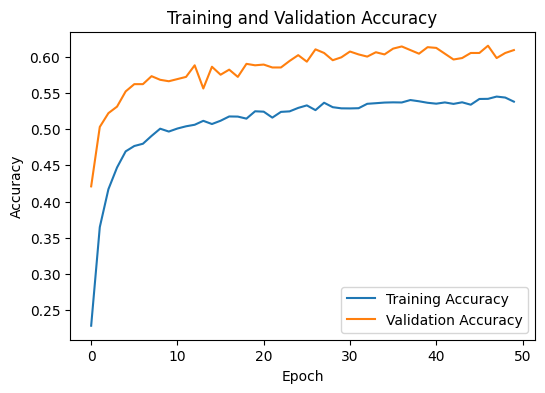

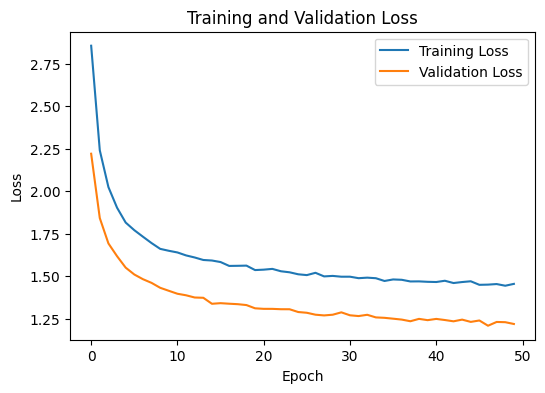

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6100 - loss: 1.2808


[1.27437162399292, 0.6039999723434448]

### 10 Layer Neural Network

In [ ]:
learning_rates = [0.001, 0.01,0.0001]
batch_sizes = [32, 64]
dropout = [0.1,0.2]
best_accuracy = 0
input_shape = X_train.shape[1:]
best_history = None
best_model = None

for lr in learning_rates:
    for batch in batch_sizes:
        for d in dropout:
            model = Ten_Layer_NN()
            config = {
                        'input_shape': input_shape,
                        'epochs': 50,
                        'dropout': d,
                        'batch_size': batch,
                        'lr': lr
                    }
            model.build_model(config)
            history = model.train(X_train, y_train, X_valid, y_valid, config)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch, 'dropout': d}
                best_history = history

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_126              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_127              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_128              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_129              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_130              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_131              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1039 - loss: 3.4464 - val_accuracy: 0.2840 - val_loss: 2.4897
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2492 - loss: 2.6182 - val_accuracy: 0.4170 - val_loss: 2.0357
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3261 - loss: 2.3207 - val_accuracy: 0.4690 - val_loss: 1.8317
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3502 - loss: 2.1546 - val_accuracy: 0.5010 - val_loss: 1.7345
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3849 - loss: 2.0567 - val_accuracy: 0.5110 - val_loss: 1.6658
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3992 - loss: 2.0023 - val_accuracy: 0.5320 - val_loss: 1.6228
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4141 - loss: 1.9537 - val_accuracy: 0.5250 - val_loss: 1.5884
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4233 - loss: 1.9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_135              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_136              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_137              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_136 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_138              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_137 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_139              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_140              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_138 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0652 - loss: 3.6193 - val_accuracy: 0.2160 - val_loss: 2.6899
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1364 - loss: 2.8716 - val_accuracy: 0.2640 - val_loss: 2.4207
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1969 - loss: 2.6125 - val_accuracy: 0.3030 - val_loss: 2.2435
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2173 - loss: 2.4785 - val_accuracy: 0.3220 - val_loss: 2.1304
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2494 - loss: 2.3779 - val_accuracy: 0.3550 - val_loss: 2.0285
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2502 - loss: 2.3063 - val_accuracy: 0.3630 - val_loss: 1.9734
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2790 - loss: 2.2437 - val_accuracy: 0.4030 - val_loss: 1.8944
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2960 - loss: 2.2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_144              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_142 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_145              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_143 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_146              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_144 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_147              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_148              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_149              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0837 - loss: 3.4780 - val_accuracy: 0.2820 - val_loss: 2.5967
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2366 - loss: 2.6812 - val_accuracy: 0.3750 - val_loss: 2.1362
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3069 - loss: 2.3918 - val_accuracy: 0.4480 - val_loss: 1.9425
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3446 - loss: 2.2142 - val_accuracy: 0.4790 - val_loss: 1.8183
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3786 - loss: 2.1020 - val_accuracy: 0.5040 - val_loss: 1.7367
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3948 - loss: 2.0290 - val_accuracy: 0.5150 - val_loss: 1.6753
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4021 - loss: 1.9782 - val_accuracy: 0.5290 - val_loss: 1.6197
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4242 - loss: 1.93

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_153              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_150 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_154              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_151 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_155              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_152 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_156              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_153 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_157              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_158              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_154 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0654 - loss: 3.6842 - val_accuracy: 0.2330 - val_loss: 2.8401
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1357 - loss: 2.9722 - val_accuracy: 0.3030 - val_loss: 2.3648
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1888 - loss: 2.6483 - val_accuracy: 0.3310 - val_loss: 2.2186
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2266 - loss: 2.5008 - val_accuracy: 0.3730 - val_loss: 2.1142
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2522 - loss: 2.4020 - val_accuracy: 0.3770 - val_loss: 2.0370
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2746 - loss: 2.3296 - val_accuracy: 0.3830 - val_loss: 1.9656
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2839 - loss: 2.2631 - val_accuracy: 0.4040 - val_loss: 1.9207
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3028 - loss: 2.20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_196 (Dense)                    │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_162              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_158 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_163              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_159 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_164              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_160 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_165              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_161 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_166              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_167              │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_162 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,700 (96.48 KB)

 Trainable params: 23,916 (93.42 KB)

 Non-trainable params: 784 (3.06 KB)

None
Model compiled.
Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2013 - loss: 2.7465 - val_accuracy: 0.3530 - val_loss: 2.0509
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3146 - loss: 2.1717 - val_accuracy: 0.4330 - val_loss: 1.8810
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3406 - loss: 2.1291 - val_accuracy: 0.4170 - val_loss: 1.9342
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3554 - loss: 2.0884 - val_accuracy: 0.4490 - val_loss: 1.8282
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3755 - loss: 2.0469 - val_accuracy: 0.4710 - val_loss: 1.7539
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3789 - loss: 2.0443 - val_accuracy: 0.4730 - val_loss: 1.8405
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3925 - loss: 2.0220 - val_accuracy: 0.4470 - val_loss: 1.7660
Epoch 8/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3989 - loss: 1.9

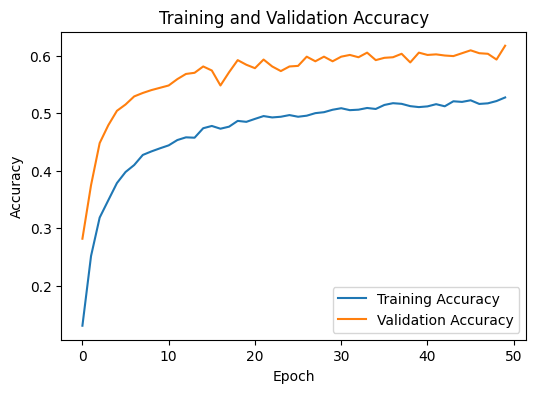

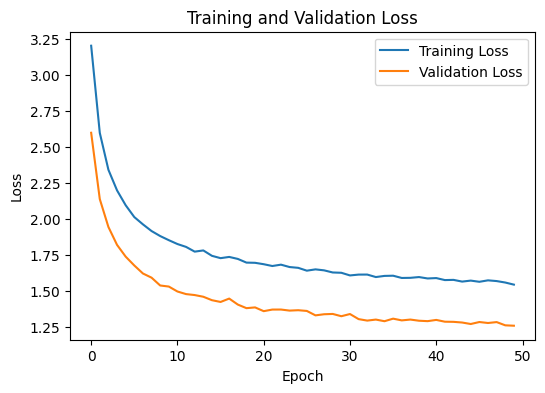

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5909 - loss: 1.3261


[1.3242542743682861, 0.5914999842643738]